In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer


In [2]:
# Load Dataset (Update file path as needed)
df = pd.read_csv("C:/Users/ASUS/Downloads/health_fitness_dataset.csv")


In [3]:
# Display first few rows
print(df.head())

   participant_id        date  age gender  height_cm  weight_kg  \
0               1  2024-01-01   56      F      165.3       53.7   
1               1  2024-01-04   56      F      165.3       53.9   
2               1  2024-01-05   56      F      165.3       54.2   
3               1  2024-01-07   56      F      165.3       54.4   
4               1  2024-01-09   56      F      165.3       54.7   

     activity_type  duration_minutes intensity  calories_burned  ...  \
0          Dancing                41       Low              3.3  ...   
1         Swimming                28       Low              2.9  ...   
2         Swimming                21    Medium              2.6  ...   
3  Weight Training                99    Medium             10.7  ...   
4         Swimming               100    Medium             12.7  ...   

   stress_level  daily_steps  hydration_level   bmi  resting_heart_rate  \
0             3         7128              1.5  19.6                69.5   
1             

In [4]:
drop_cols = ['participant_id', 'gender', 'activity_type', 'health_condition', 'smoking_status']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [5]:
df = df.drop_duplicates()

In [6]:
df = df.dropna()

In [7]:
# Encode categorical variables (intensity)
if 'intensity' in df.columns:
    label_encoder = LabelEncoder()
    df['intensity'] = label_encoder.fit_transform(df['intensity'])

In [8]:
# Selecting Features for Clustering
features = ['age', 'height_cm', 'weight_kg', 'bmi', 'duration_minutes', 'intensity', 'calories_burned',
            'daily_steps', 'avg_heart_rate', 'resting_heart_rate', 'blood_pressure_systolic', 
            'blood_pressure_diastolic', 'hours_sleep', 'stress_level', 'hydration_level', 'fitness_level']

cluster_data = df[features]

In [9]:
# Normalize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

scaled_df = pd.DataFrame(scaled_data, columns=features)

print(scaled_df.head())


        age  height_cm  weight_kg       bmi  duration_minutes  intensity  \
0  1.055931  -0.359673  -1.835205 -0.878027         -0.995349  -0.383885   
1  1.055931  -0.359673  -1.826301 -0.878027         -1.441361  -0.383885   
2  1.055931  -0.359673  -1.812945 -0.878027         -1.681521   0.897187   
3  1.055931  -0.359673  -1.804041 -0.878027          0.994548   0.897187   
4  1.055931  -0.359673  -1.790685 -0.878027          1.028857   0.897187   

   calories_burned  daily_steps  avg_heart_rate  resting_heart_rate  \
0        -1.209879    -0.730195       -1.597227           -0.100609   
1        -1.249937    -0.342314       -1.653360           -0.100609   
2        -1.279980    -0.521411       -0.306160           -0.100609   
3        -0.468808     1.212616        0.535839           -0.100609   
4        -0.268518    -1.568251       -1.092027           -0.100609   

   blood_pressure_systolic  blood_pressure_diastolic  hours_sleep  \
0                -0.929298                 -0.8

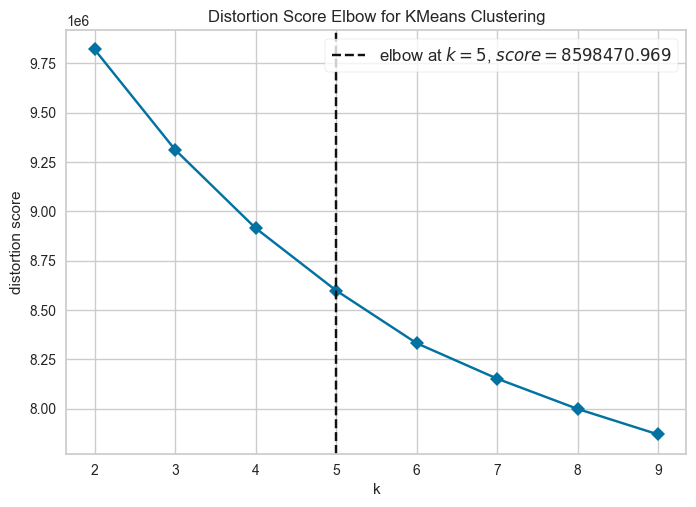

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# STEP 4: Finding Optimal Clusters for K-Means #
###########################################
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion', timings=False)
visualizer.fit(scaled_df)
visualizer.show()

In [11]:
# STEP 5: Apply K-Means Clustering #
#####################################
optimal_k = 5  # Adjust based on Elbow Method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
scaled_df['Cluster_KMeans'] = kmeans.fit_predict(scaled_df)

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(scaled_df.iloc[:, :-1], scaled_df['Cluster_KMeans'])
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

K-Means Silhouette Score: 0.06909067065602925


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


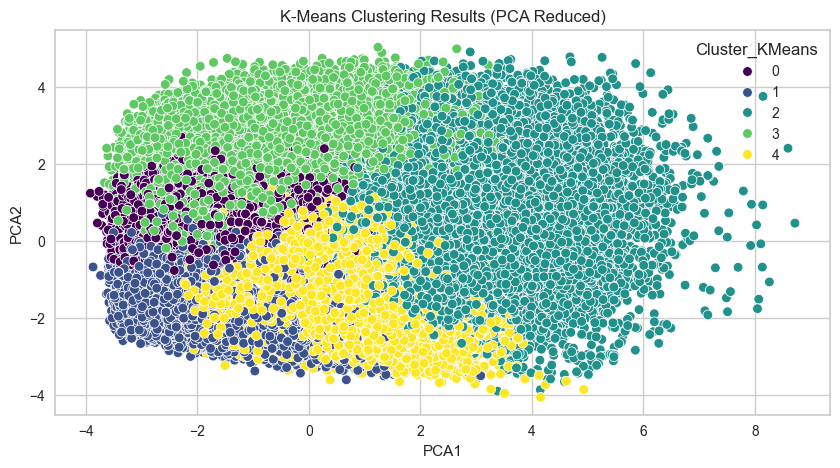

In [12]:
# STEP 7: Visualizing Clusters with PCA #
###############################################
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df.iloc[:, :-2])
scaled_df['PCA1'] = df_pca[:, 0]
scaled_df['PCA2'] = df_pca[:, 1]

# Plot K-Means Clusters
plt.figure(figsize=(10,5))
sns.scatterplot(data=scaled_df, x="PCA1", y="PCA2", hue="Cluster_KMeans", palette="viridis")
plt.title("K-Means Clustering Results (PCA Reduced)")
plt.show()


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


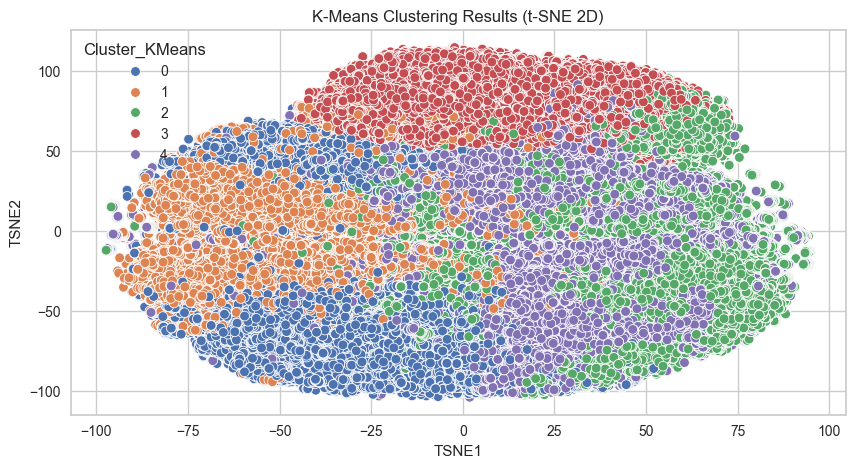

In [14]:
# t-SNE 2D
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result_2d = tsne_2d.fit_transform(scaled_df.iloc[:, :-3])
scaled_df['TSNE1'] = tsne_result_2d[:, 0]
scaled_df['TSNE2'] = tsne_result_2d[:, 1]

plt.figure(figsize=(10,5))
sns.scatterplot(data=scaled_df, x="TSNE1", y="TSNE2", hue="Cluster_KMeans", palette="deep")
plt.title("K-Means Clustering Results (t-SNE 2D)")
plt.show()

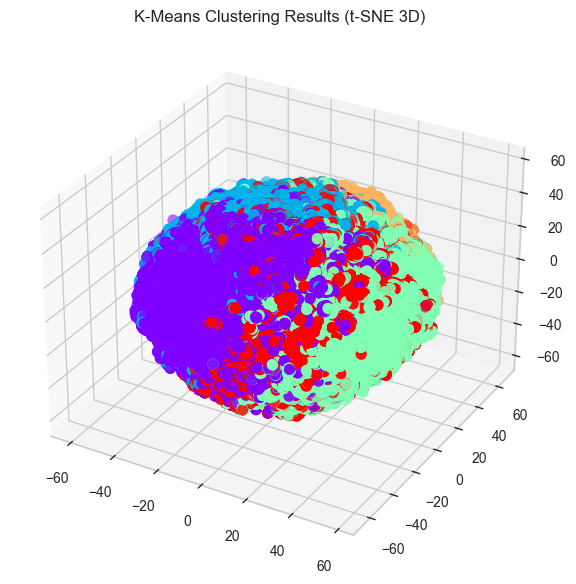

In [15]:
# t-SNE 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
tsne_result_3d = tsne_3d.fit_transform(scaled_df.iloc[:, :-5])
ax.scatter(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2], 
           c=scaled_df['Cluster_KMeans'], cmap='rainbow', s=60)
ax.set_title("K-Means Clustering Results (t-SNE 3D)")
plt.show()

In [16]:
def recommend_plan(cluster_label):
    recommendations = {
        0: "Increase daily steps and hydration, reduce stress levels.",
        1: "Maintain balanced workouts and optimize sleep routine.",
        2: "Focus on improving endurance with high-intensity workouts.",
        3: "Incorporate strength training and monitor blood pressure closely.",
        4: "Work on weight management and cardiovascular health strategies."
    }
    return recommendations.get(cluster_label, "No recommendation available.")

scaled_df['Recommendation'] = scaled_df['Cluster_KMeans'].apply(recommend_plan)

# Show Recommendations
print(scaled_df[['Cluster_KMeans', 'Recommendation']].drop_duplicates())

     Cluster_KMeans                                     Recommendation
0                 1  Maintain balanced workouts and optimize sleep ...
6                 3  Incorporate strength training and monitor bloo...
107               2  Focus on improving endurance with high-intensi...
121               4  Work on weight management and cardiovascular h...
234               0  Increase daily steps and hydration, reduce str...
